<a href="https://colab.research.google.com/github/sergiynesterenko90/feranec/blob/main/notebooks/handwriting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import the necessary libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
tf.config.list_physical_devices('GPU')  # check that we actually have a GPU

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Get the handwriting dataset

In [3]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # scale the raw data to the 0-1 range

11490434/11490434 [==============================] - 1s 0us/step


# Plot a few of the images

Label: 5


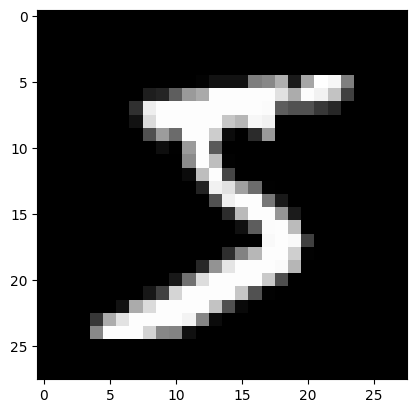

Label: 0


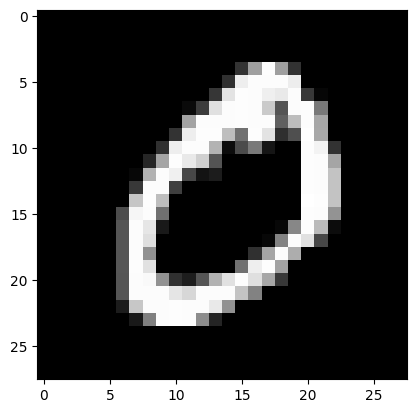

Label: 4


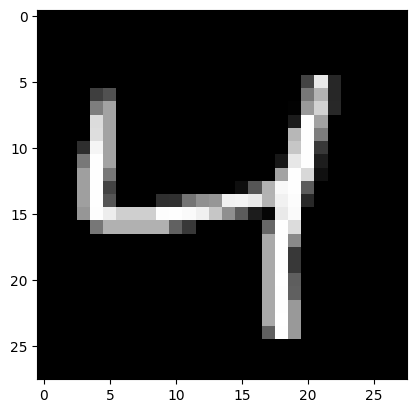

Label: 1


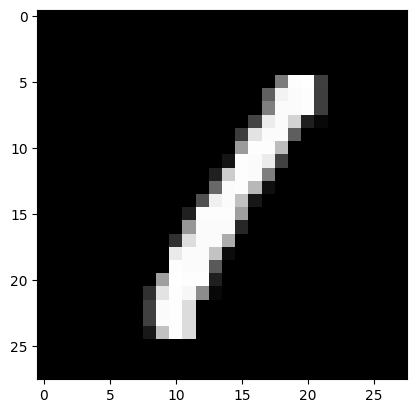

Label: 9


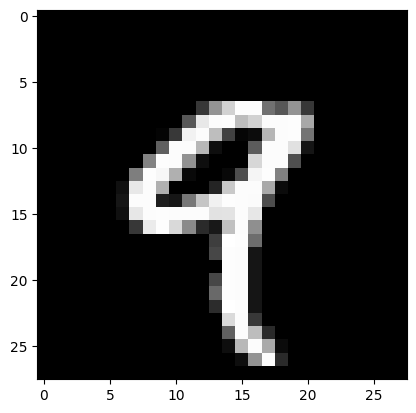

Label: 2


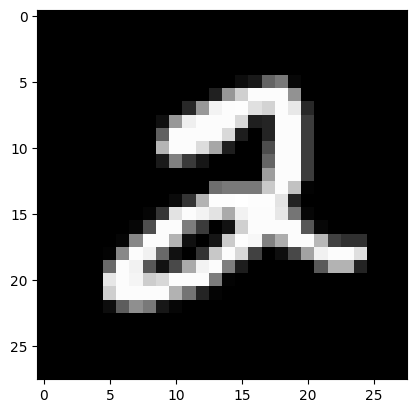

Label: 1


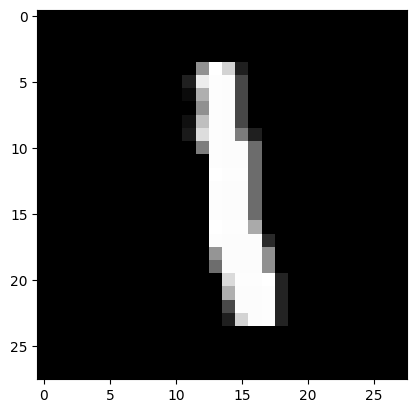

Label: 3


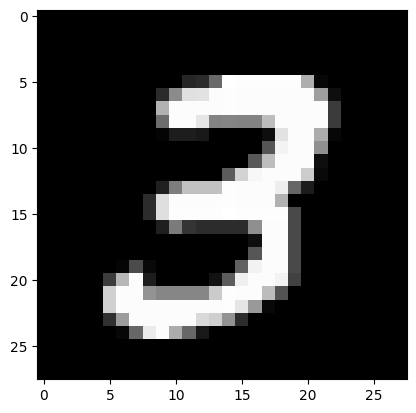

Label: 1


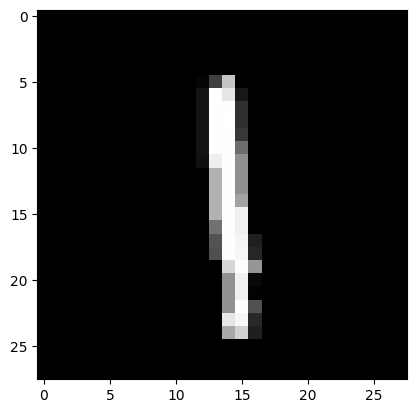

Label: 4


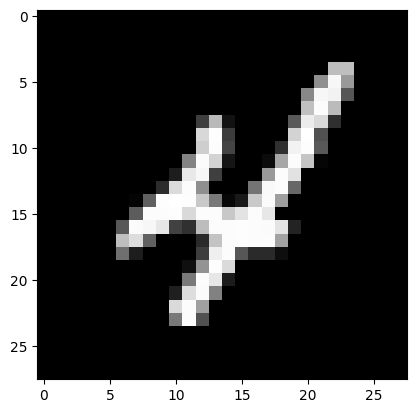

In [4]:
for N in range(10):
  print("Label:", y_train[N])
  plt.imshow(x_train[N], cmap="gray")
  plt.show()

# Look at the raw data

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

# Create the Neural Network

In [7]:
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(256, activation="relu"),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10)
    ]
)

# Show how to make predictions (before training the net)

In [8]:
predictions = model(x_train[:1])
predictions

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[ 0.25514928,  0.18956836,  0.10398254,  0.44699243, -0.440202  ,
         0.30891684,  0.18877456,  0.09408595,  0.5243427 ,  0.12610029]],
      dtype=float32)>

In [9]:
tf.nn.softmax(predictions)

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[0.10485803, 0.09820199, 0.0901469 , 0.12703346, 0.05231359,
        0.11065032, 0.09812406, 0.08925916, 0.13724954, 0.09216297]],
      dtype=float32)>

In [10]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [11]:
loss_fn(y_train[:1], predictions)

<tf.Tensor: shape=(), dtype=float32, numpy=2.2013805>

In [12]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)

model.compile(optimizer=optimizer, loss=loss_fn, metrics=["accuracy"], jit_compile=True)

In [13]:
history = model.fit(x_train, y_train, epochs=100, validation_split=0.2, batch_size=2400)

Epoch 1/100
20/20 [==============================] - 5s 56ms/step - loss: 1.2688 - accuracy: 0.6311 - val_loss: 0.4233 - val_accuracy: 0.8804
Epoch 2/100
20/20 [==============================] - 0s 10ms/step - loss: 0.4667 - accuracy: 0.8579 - val_loss: 0.2802 - val_accuracy: 0.9189
Epoch 3/100
20/20 [==============================] - 0s 8ms/step - loss: 0.3268 - accuracy: 0.9025 - val_loss: 0.2233 - val_accuracy: 0.9342
Epoch 4/100
20/20 [==============================] - 0s 9ms/step - loss: 0.2649 - accuracy: 0.9219 - val_loss: 0.1913 - val_accuracy: 0.9441
Epoch 5/100
20/20 [==============================] - 0s 8ms/step - loss: 0.2252 - accuracy: 0.9337 - val_loss: 0.1658 - val_accuracy: 0.9507
Epoch 6/100
20/20 [==============================] - 0s 8ms/step - loss: 0.1983 - accuracy: 0.9411 - val_loss: 0.1503 - val_accuracy: 0.9553
Epoch 7/100
20/20 [==============================] - 0s 8ms/step - loss: 0.1760 - accuracy: 0.9486 - val_loss: 0.1362 - val_accuracy: 0.9589
Epoch 8/100

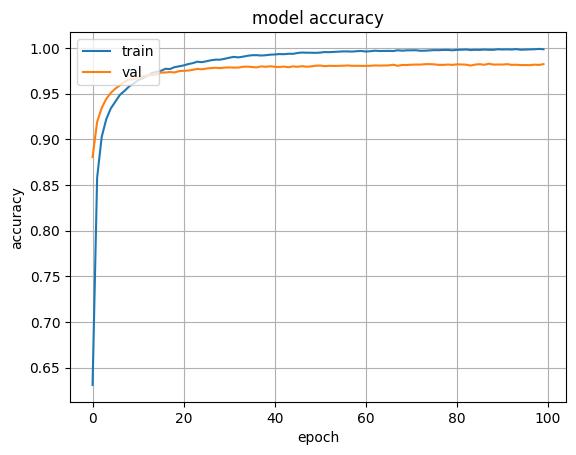

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.grid()
plt.show()

In [15]:
eval = model.evaluate(x_test, y_test, verbose=2)
for name, ev in zip(model.metrics_names, eval):
    print(name, ev)

313/313 - 1s - loss: 0.0776 - accuracy: 0.9828 - 1s/epoch - 4ms/step
loss 0.0775635689496994
accuracy 0.9828000068664551


In [16]:
tf.math.confusion_matrix(y_test, tf.argmax(model(x_test), axis=1))

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 970,    1,    1,    1,    1,    1,    2,    1,    1,    1],
       [   0, 1124,    4,    1,    0,    0,    2,    1,    3,    0],
       [   1,    1, 1019,    0,    1,    0,    2,    5,    3,    0],
       [   0,    0,    3,  996,    0,    4,    0,    3,    2,    2],
       [   2,    0,    2,    0,  966,    0,    5,    1,    1,    5],
       [   2,    0,    0,    9,    1,  868,    5,    1,    4,    2],
       [   3,    2,    0,    1,    2,    3,  945,    0,    2,    0],
       [   1,    6,    8,    3,    0,    0,    0, 1006,    2,    2],
       [   1,    1,    1,    2,    4,    2,    0,    4,  957,    2],
       [   2,    3,    0,    8,   10,    1,    0,    7,    1,  977]],
      dtype=int32)>

# Convert model to TFLite

openmv passes a 28x28x1 tensor, not 28x28 - so we need to add a reshape

In [17]:
openmv_model = tf.keras.Sequential(
    [
        tf.keras.layers.Reshape((28, 28), input_shape=(28, 28, 1)),
        model,
    ]
)

quantize the model

In [18]:
def representative_dataset():
    for image in x_test:
        img = tf.expand_dims(image, axis=2)
        yield [np.array([[img]], dtype=np.float32)]

converter = tf.lite.TFLiteConverter.from_keras_model(openmv_model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.representative_dataset = representative_dataset

converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
converter.inference_input_type = tf.int8
converter.inference_output_type = tf.int8

tflite_quant_model = converter.convert()

/usr/local/lib/python3.10/dist-packages/tensorflow/lite/python/convert.py:789: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "


save the model

In [19]:
with open("model.tflite", "wb") as output:
    print("size:", len(tflite_quant_model))
    output.write(tflite_quant_model);

size: 239128
